# Data processing 

Experiments gni

In [20]:
import pandas as pd
import os
from sklearn.preprocessing import minmax_scale
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
df_data = None
data_dict = {}
df_output = pd.DataFrame();

for filename in os.listdir(os.getcwd()):
    if("spreadsheet" in filename):        
        country = filename.split("-")[0]
        df_data = pd.read_csv(filename, skiprows=70,  header=None)
        df_data.pop(df_data.columns[0])
        df_data.insert(0, 'country', country)
        df_output = df_output.append(df_data)
df_output


C:\Users\Arles\AppData\Local\Temp\ipykernel_8008\229962085.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_output = df_output.append(df_data)
C:\Users\Arles\AppData\Local\Temp\ipykernel_8008\229962085.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_output = df_output.append(df_data)
C:\Users\Arles\AppData\Local\Temp\ipykernel_8008\229962085.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_output = df_output.append(df_data)
C:\Users\Arles\AppData\Local\Temp\ipykernel_8008\229962085.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_output = df_output.append(df_data)
C:\Users\Arles\AppData\Local\Temp\ipykernel_

,country,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,Argentina,5.886067,5.902019,5.836702,5.855467,5.802572,5.874525,5.862060,5.837817,5.879752,...,5.785486,5.829934,5.968906,5.860213,5.898010,5.836480,5.886750,5.872050,5.829432,5.907473
0,Bolivia,-7.348745,-7.211522,-7.344184,-7.356654,-7.344223,-7.377376,-7.295301,-7.328379,-7.352002,...,-7.301779,-7.250004,-7.333291,-7.301146,-7.314897,-7.366845,-7.256126,-7.305007,-7.308215,-7.356226
0,Brazil,5.042303,5.246770,5.160967,5.093976,5.167831,5.139809,5.110005,5.125291,5.029376,...,5.049790,5.142784,5.190794,5.131131,5.221436,5.200397,5.086580,5.162550,5.238130,5.244634
0,Chile,5.199173,5.195614,5.204179,5.194753,5.194847,5.257807,5.183499,5.201243,5.211738,...,5.159227,5.107853,5.200565,5.240531,5.231145,5.239119,5.118857,5.197712,5.210573,5.117351
0,China,7.711969,7.664335,7.904351,7.838906,7.813666,7.735088,7.757129,7.733012,7.726683,...,7.899257,7.749940,7.728381,7.742429,7.737884,7.796737,7.729134,7.752146,7.660017,7.772560
0,Colombia,0.204668,0.306430,0.127990,0.172901,0.202495,0.219400,0.257696,0.185160,0.202667,...,0.118822,0.225636,0.228935,0.213594,0.220899,0.250942,0.228089,0.264443,0.309703,0.210709
0,Costa Rica,1.755940,1.723522,1.687304,1.758761,1.754131,1.715937,1.776440,1.692284,1.752310,...,1.724766,1.700776,1.692325,1.636553,1.704916,1.768671,1.718684,1.706167,1.704315,1.758293
0,Denmark,14.907420,14.861155,14.923258,14.899604,14.956319,15.001762,14.879509,14.888704,14.947294,...,14.914009,14.974635,14.797232,15.001747,14.926096,14.866852,14.799967,15.006782,14.945555,14.863430
0,Ecuador,-1.737270,-1.787287,-1.793721,-1.784002,-1.688676,-1.811669,-1.734480,-1.682755,-1.837882,...,-1.761327,-1.689833,-1.679290,-1.806664,-1.733520,-1.828214,-1.760751,-1.702333,-1.706780,-1.820961
0,El salvador,-9.647768,-9.695745,-9.720848,-9.631751,-9.612451,-9.748538,-9.654850,-9.700113,-9.794176,...,-9.662355,-9.682353,-9.687798,-9.621235,-9.706105,-9.683157,-9.726176,-9.664461,-9.721069,-9.665024


In [22]:
country_gni = pd.read_excel(r'../countrygni.xlsx')
merged_df=pd.merge(df_output, country_gni, left_on="country", right_on="Country")
merged_df.pop('Country')
merged_df
merged_df.to_excel(r'../output_experiment_gni_wn.xlsx')

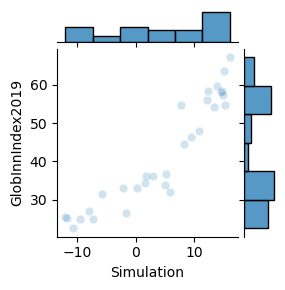

In [23]:
figure = sns.jointplot(
    data=merged_df,
    x=1,
    y='GlobInnIndex2019',
    height=3,
    alpha=0.2,
   # hue='binary_state',
    #alpha=0.6,
    #kind="hex"
    #kind="reg",
     #logx=True
)
figure.set_axis_labels('Simulation', 'GlobInnIndex2019')



## Spearman test Correlations

Correlates output of experiments with Global Innovation Index

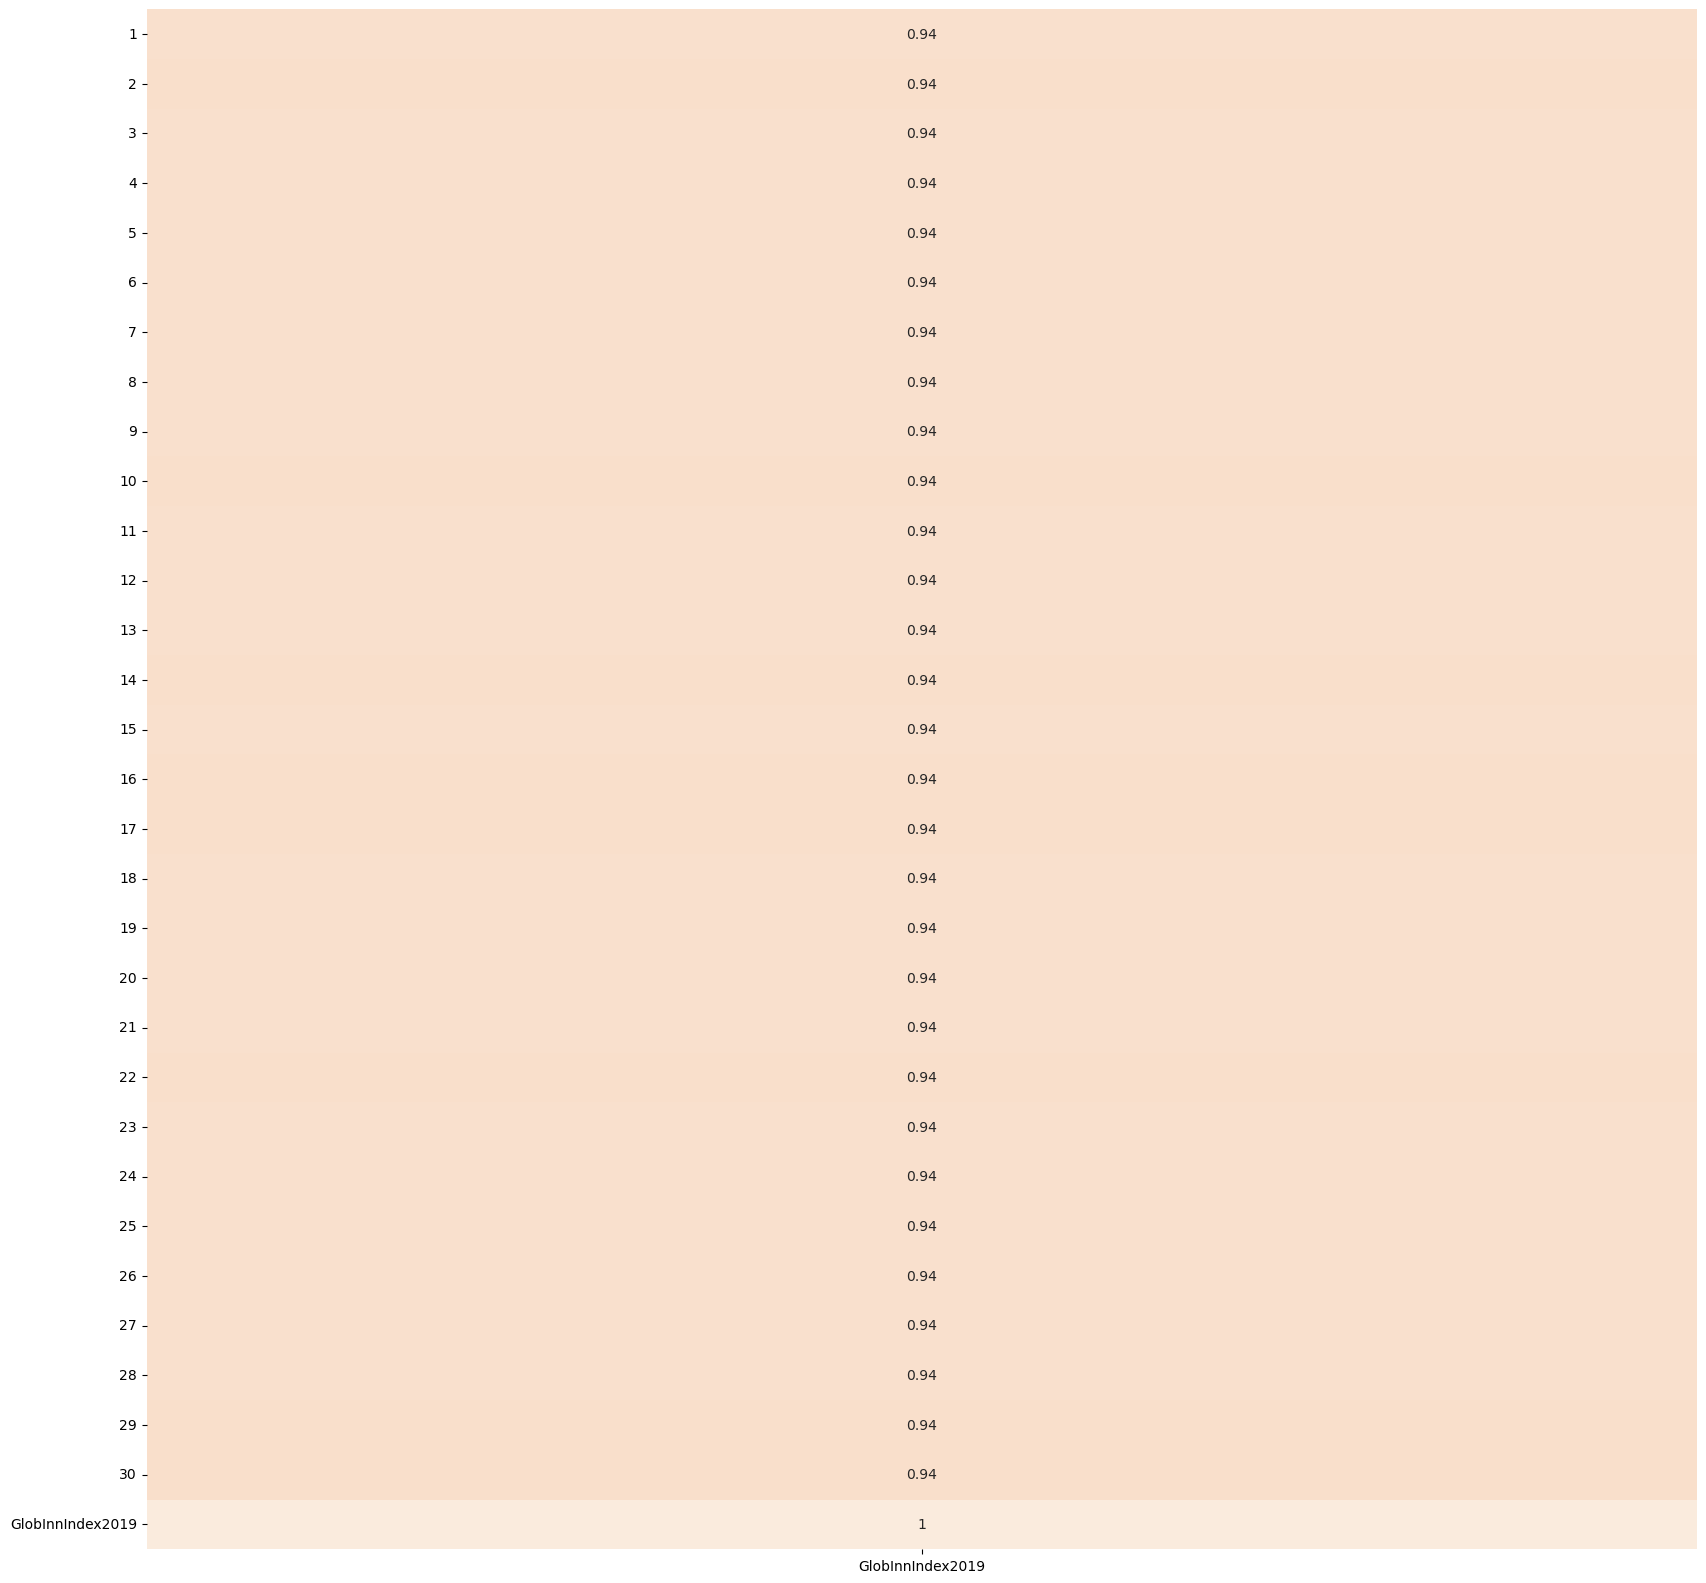

In [24]:
df_data = merged_df.loc[:, merged_df.columns != "country"];
df_data_corr = df_data.corr(method="spearman")[['GlobInnIndex2019']]

plt.figure(figsize=(20,20))
sns.heatmap(df_data_corr, annot=True, vmin=-1, vmax=1, cbar=False)
plt.show()
